In [ ]:
# installs
! pip install newspaper3k
! pip install wordcloud
! pip install emoji
! pip install nltk
! pip install scikit-plot
! pip install umap-learn
! pip install afinn
! pip install -U spacy
! pip install spacytextblob

In [2]:
import pandas as pd

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplot

# some "fun" packages
from wordcloud import WordCloud
import emoji

import re

# text imports

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from afinn import Afinn

from newspaper import Article

ModuleNotFoundError: ignored

In [3]:
ok_text = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/OkCupid/main/text.csv')

In [4]:
ok_text.sample(3)

,id,Full_essay,location
2430,16182,i'm rational and skeptical on the important th...,"stanford, california"
4111,27112,"i'm living life here in the city, working hard...","san francisco, california"
5233,34270,new to this site. i'm looking to meet other gu...,"san mateo, california"


In [ ]:
# Vectorize the data

tf = TfidfVectorizer()

In [ ]:
ok_text.Full_essay = str(ok_text.Full_essay)

In [ ]:
type(ok_text.Full_essay)

pandas.core.series.Series

In [ ]:
# Try fit body_type

tf.fit(ok_text.Full_essay)

TfidfVectorizer()

In [ ]:
dtm = tf.transform(ok_text.Full_essay)

In [ ]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [ ]:
dtm.shape

(9055, 17)

In [ ]:
from umap import UMAP

In [ ]:
# umap for DR

umap = UMAP(random_state = 820)
embeds = umap.fit_transform(dtm)

In [ ]:
embeds.shape

(9055, 2)

In [ ]:
type(embeds)

numpy.ndarray

In [ ]:
# scatter plot for wiz

import seaborn as sns

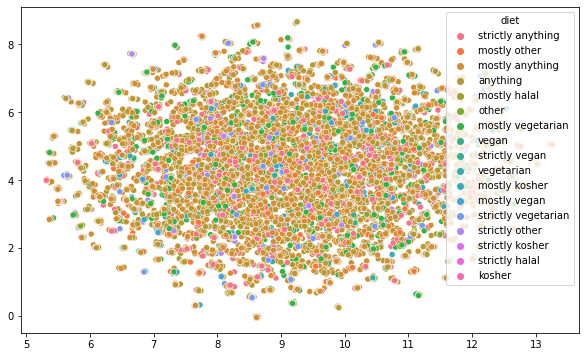

In [ ]:
# plot it up

plt.figure(figsize=(10,6))
sns.scatterplot(x = embeds[:, 0], y = embeds[:, 1], hue = ok_text.diet)

In [ ]:
# Try fit diet

tf.fit(ok_text.pets)

TfidfVectorizer()

In [ ]:
dtm = tf.transform(ok_text.pets)

In [ ]:
dtm.shape

(9055, 6)

In [ ]:
# umap for DR

umap = UMAP(random_state = 820)
embeds = umap.fit_transform(dtm)

In [ ]:
embeds.shape

(9055, 2)

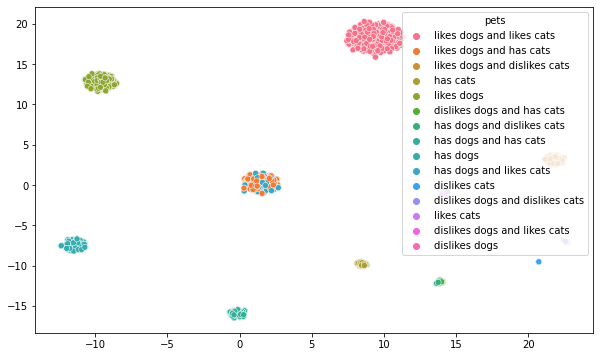

In [ ]:
# plot it up

plt.figure(figsize=(10,6))
sns.scatterplot(x = embeds[:, 0], y = embeds[:, 1], hue = ok_text.pets)

In [ ]:
# setup the afinn "model"

afinn = Afinn()

In [ ]:
# Apply the sentiment over the dataframe

from afinn import afinn

afinn = Afinn()

# functions
def sentiment(text):
  return afinn.score(text)



In [ ]:
# apply the sentiment score

ok_text['affin'] = ok_text.Full_essay.apply(sentiment)

In [ ]:
ok_text.sample(5)

,id,Full_essay,body_type,diet,ethnicity,job,location,pets,religion,sign,affin
5128,33561,0 0 0 about me: i would lov...,athletic,mostly anything,white,artistic / musical / writer,"san francisco, california",has dogs and has cats,atheism but not too serious about it,scorpio and it&rsquo;s fun to think about,30.0
3769,25008,0 0 0 about me: i would lov...,skinny,mostly anything,white,artistic / musical / writer,"san anselmo, california",has dogs,other and laughing about it,pisces and it&rsquo;s fun to think about,30.0
6501,42949,0 0 0 about me: i would lov...,average,mostly anything,"middle eastern, hispanic / latin, white",medicine / health,"san francisco, california",has dogs and dislikes cats,other and laughing about it,sagittarius but it doesn&rsquo;t matter,30.0
2970,19792,0 0 0 about me: i would lov...,normal,anything,white,clerical / administrative,"sausalito, california",likes dogs and has cats,atheism and very serious about it,virgo but it doesn&rsquo;t matter,30.0
7,44,0 0 0 about me: i would lov...,curvy,anything,white,other,"san francisco, california",has cats,other,aquarius and it&rsquo;s fun to think about,30.0


In [ ]:
ok_text.affin.describe()

count    9055.0
mean       30.0
std         0.0
min        30.0
25%        30.0
50%        30.0
75%        30.0
max        30.0
Name: affin, dtype: float64